# Classifying newswires
- Single-label, multiclass classification (46 classes)

In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 1s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [11]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [12]:
train_labels[10]

3

In [15]:
# Vectorize the data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
# one-hot encode the labels
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [17]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [49]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 2s 232us/step - loss: 2.8115 - acc: 0.4806 - val_loss: 1.9355 - val_acc: 0.5690
Epoch 2/10
7982/7982 [==============================] - 1s 77us/step - loss: 1.6534 - acc: 0.6060 - val_loss: 1.5334 - val_acc: 0.6320
Epoch 3/10
7982/7982 [==============================] - 1s 78us/step - loss: 1.3122 - acc: 0.6906 - val_loss: 1.3856 - val_acc: 0.6740
Epoch 4/10
7982/7982 [==============================] - 1s 77us/step - loss: 1.0853 - acc: 0.7487 - val_loss: 1.2764 - val_acc: 0.7190
Epoch 5/10
7982/7982 [==============================] - 1s 79us/step - loss: 0.9013 - acc: 0.7967 - val_loss: 1.1739 - val_acc: 0.7480
Epoch 6/10
7982/7982 [==============================] - 1s 80us/step - loss: 0.7327 - acc: 0.8355 - val_loss: 1.1239 - val_acc: 0.7620
Epoch 7/10
7982/7982 [==============================] - 1s 79us/step - loss: 0.6157 - acc: 0.8603 - val_loss: 1.1196 - val_acc: 0.7640
Epoch 

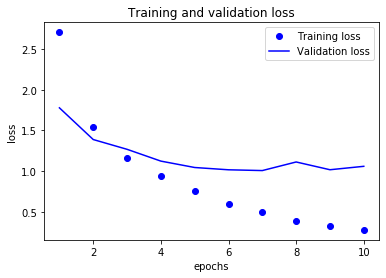

In [48]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [29]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 63us/step


[1.2110123802059374, 0.778717720444884]

In [36]:
# What would random chance be?
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18655387355298308

In [38]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

3